In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from statsmodels.stats.proportion import proportions_ztest

In [40]:
# Read the files
#df_final_demo = pd.read_csv('df_final_demo.txt', delimiter=',')
#df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')
#df_final_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')
#df_final_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt', delimiter=',')

In [41]:
# Check for missing values
print(df_final_demo.isnull().sum())

# Fill missing values or drop rows with significant missing data
df_final_demo['clnt_age'] = df_final_demo['clnt_age'].fillna(df_final_demo['clnt_age'].median())
df_final_demo['gendr'] = df_final_demo['gendr'].fillna('Unknown')

# Replace negative or invalid values with NaN and handle them
df_final_demo['bal'] = df_final_demo['bal'].apply(lambda x: np.nan if x < 0 else x)
df_final_demo = df_final_demo.dropna()  # Drop rows with invalid values

NameError: name 'df_final_demo' is not defined

In [ ]:
#test case
print(df_final_experiment_clients.head())

In [ ]:
#clean df_final_experiment
if 'Variation' in df_final_experiment_clients.columns:
    print(df_final_experiment_clients['Variation'].unique())
else:
    print("'Variation' column not found. Cannot proceed with analysis.")


In [ ]:
#df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.csv', delimiter=',')

# Ensure Variation contains only valid entries
print(df_final_experiment_clients['Variation'].unique())

# Fix invalid variations (if any)
valid_variations = ['Test', 'Control']
df_final_experiment_clients = df_final_experiment_clients[
    df_final_experiment_clients['Variation'].isin(valid_variations)
]

In [ ]:
# Concatenate the two parts
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)

# Convert `date_time` to datetime format
df_final_web_data['date_time'] = pd.to_datetime(df_final_web_data['date_time'])

# Check for duplicates and drop them
df_final_web_data = df_final_web_data.drop_duplicates()

# Ensure `process_step` is valid (e.g., integers or known steps)
print(df_final_web_data['process_step'].unique())


In [ ]:
merged_data = pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='inner')

# Merge the web data
merged_data = pd.merge(merged_data, df_final_web_data, on='client_id', how='inner')

In [ ]:
merged_data.to_csv('cleaned_data.csv', index=False)


In [ ]:
#print("Current Working Directory:", os.getcwd())
#os.chdir('..vanguard-ab-test/data/clean')

In [ ]:
#print out csv header 
df_all_clean = pd.read_csv("../cleaned_data.csv", dtype={'Variation': 'str'}, low_memory=False)
print(df_all_clean.dtypes)

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
visitor_id           object
visit_id             object
process_step         object
date_time            object
dtype: object


In [ ]:
# Check the structure of the data
print(df_all_clean.info())
print(df_all_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443897 entries, 0 to 443896
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         443897 non-null  int64  
 1   clnt_tenure_yr    443784 non-null  float64
 2   clnt_tenure_mnth  443784 non-null  float64
 3   clnt_age          443772 non-null  float64
 4   gendr             443784 non-null  object 
 5   num_accts         443784 non-null  float64
 6   bal               443784 non-null  float64
 7   calls_6_mnth      443784 non-null  float64
 8   logons_6_mnth     443784 non-null  float64
 9   Variation         317235 non-null  object 
 10  visitor_id        443897 non-null  object 
 11  visit_id          443897 non-null  object 
 12  process_step      443897 non-null  object 
 13  date_time         443897 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 47.4+ MB
None
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_

In [ ]:
print(df_all_clean.describe())
print(df_all_clean['gendr'].value_counts())

          client_id  clnt_tenure_yr  clnt_tenure_mnth       clnt_age  \
count  4.438970e+05   443784.000000     443784.000000  443772.000000   
mean   5.004505e+06       12.230889        152.776299      47.639365   
std    2.874021e+06        7.002258         83.686207      15.732393   
min    1.690000e+02        2.000000         33.000000      13.500000   
25%    2.517722e+06        6.000000         82.000000      33.500000   
50%    5.025948e+06       11.000000        139.000000      49.000000   
75%    7.473636e+06       16.000000        194.000000      60.000000   
max    9.999839e+06       62.000000        749.000000      96.000000   

           num_accts           bal   calls_6_mnth  logons_6_mnth  
count  443784.000000  4.437840e+05  443784.000000  443784.000000  
mean        2.264113  1.587709e+05       3.523088       5.704879  
std         0.542551  3.359062e+05       2.242461       2.356096  
min         1.000000  1.378942e+04       0.000000       1.000000  
25%         2.00

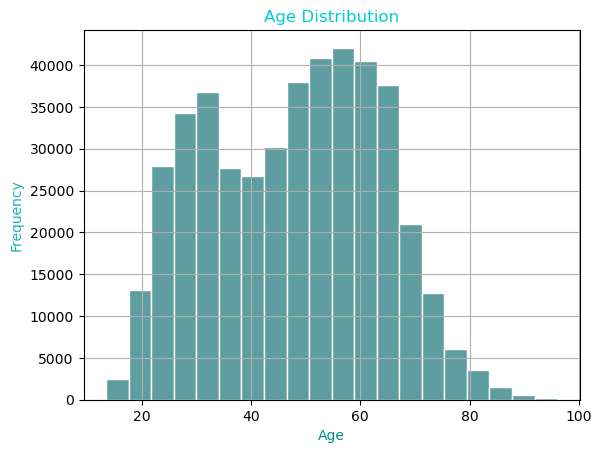

In [ ]:
# Set pastel color for axis labels
pastel_color = '#AEC6CF'  # Example pastel blue from a pastel palette

# Plot with pastel style
df_all_clean['clnt_age'].hist(bins=20, color='#5F9EA0', edgecolor='white')  # Add pastel orange for the bars
plt.title('Age Distribution', color='#00CED1')  # Pastel green title
plt.xlabel('Age', color='#008B8B')  # Use pastel blue for the label
plt.ylabel('Frequency', color='#20B2AA')  # Use pastel blue for the label
#plt.savefig('average_age_by_variation.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()



In [ ]:
df_all_clean.plot.scatter(x='num_accts', y='bal', alpha=0.5)
plt.title('Balance vs. Number of Accounts')
plt.show()


In [ ]:
print(df_all_clean.groupby('Variation')['clnt_age'].mean())
print(df_all_clean.groupby('Variation')['bal'].mean())


In [ ]:
# Nouse Plot average age by Variation
'''average_age = df_all_clean.groupby('Variation')['clnt_age'].mean()

plt.figure(figsize=(8, 5))
plt.bar(average_age.index, average_age.values, alpha=0.7)
plt.title('Average Age by Variation')
plt.ylabel('Average Age')
plt.xlabel('Variation')
plt.show()'''


In [ ]:
# Filter for the 'confirm' step
completion_data = df_all_clean[df_all_clean['process_step'] == 'confirm']

# Calculate completion rates
total_test = len(df_all_clean[df_all_clean['Variation'] == 'Test'])
total_control = len(df_all_clean[df_all_clean['Variation'] == 'Control'])
confirm_test = len(completion_data[completion_data['Variation'] == 'Test'])
confirm_control = len(completion_data[completion_data['Variation'] == 'Control'])

test_completion_rate = confirm_test / total_test
control_completion_rate = confirm_control / total_control

print(f"Test Completion Rate: {test_completion_rate}")
print(f"Control Completion Rate: {control_completion_rate}")


Test Completion Rate: 0.1448791447602986
Control Completion Rate: 0.12335629304946776


In [ ]:
'''# Separate Test and Control groups
test_group = df_all_clean[df_all_clean['Variation'] == 'Test']
control_group = df_all_clean[df_all_clean['Variation'] == 'Control']

# Check backward steps for Test and Control groups
test_backward_steps = len(backward_steps[backward_steps['visitor_id'].isin(test_group['visitor_id'])])
control_backward_steps = len(backward_steps[backward_steps['visitor_id'].isin(control_group['visitor_id'])])

print("Backward steps for Test group:", test_backward_steps)
print("Backward steps for Control group:", control_backward_steps)


NameError: name 'backward_steps' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
groups = ['Test', 'Control']
backward_steps_counts = [test_backward_steps, control_backward_steps]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(groups, backward_steps_counts, alpha=0.7, color='blue')
plt.ylabel('Number of Backward Steps')
plt.title('Backward Steps Comparison: Test vs. Control Groups')
#plt.savefig("backward_step_counts.png", format='png', dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'test_backward_steps' is not defined

In [ ]:
# Create bar chart for error rates
plt.figure(figsize=(10, 6))
plt.bar(groups, error_rates, alpha=0.7, label='Error Rate', color='green')
plt.ylabel('Error Rate')
plt.title('Error Rate Comparison: Test vs. Control Groups')
plt.legend()
plt.show()


In [ ]:
'''# Create a bar chart for error rate by age group
plt.figure(figsize=(12, 6))
plt.bar(age_groups['clnt_age'], age_groups['error_rate'], color='skyblue', alpha=0.8)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.title('Error Rate by Age Group', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and display the chart
plt.savefig('error_rate_by_age_group.png', format='png', dpi=300)
plt.show()

# Create a line plot for total steps and backward steps by age group
plt.figure(figsize=(12, 6))
plt.plot(age_groups['clnt_age'], age_groups['total_steps'], label='Total Steps', color='blue', marker='o')
plt.plot(age_groups['clnt_age'], age_groups['backward_steps'], label='Backward Steps', color='red', marker='o')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Total Steps and Backward Steps by Age Group', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('steps_by_age_group.png', format='png', dpi=300)
plt.show()


NameError: name 'age_groups' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
df = pd.read_csv("../cleaned_data.csv", dtype={'Variation': 'str'}, low_memory=False)

In [ ]:
print(df.columns)


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')


In [43]:
step_mapping = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
df['process_step_num'] = df['process_step'].map(step_mapping)


In [45]:
# Calculate step differences to identify backward steps
df['step_diff'] = df.groupby('visitor_id')['process_step_num'].diff()

# Identify backward steps
df['is_backward'] = df['step_diff'] < 0

# Calculate total backward steps
total_backward_steps = df['is_backward'].sum()

# Display the total backward steps
print(f"Total Backward Steps: {total_backward_steps}")


Total Backward Steps: 265351


In [ ]:
print(df[['process_step', 'process_step_num']].drop_duplicates())


  process_step  process_step_num
0      confirm                 5
3       step_3                 4
4       step_2                 3
5       step_1                 2
6        start                 1


In [ ]:
df['process_step_num'] = df['process_step'].map(step_mapping).fillna(0)  # Replace NaN with 0


In [11]:
df['step_diff'] = df.groupby('visitor_id')['process_step_num'].diff()
df['is_backward'] = df['step_diff'] < 0


In [12]:
print(df[['step_diff', 'is_backward']].drop_duplicates())


      step_diff  is_backward
0           NaN        False
1           0.0        False
3          -1.0         True
27          1.0        False
81          4.0        False
87          2.0        False
188         3.0        False
245        -3.0         True
329        -2.0         True
3108       -4.0         True


In [13]:
test_group = df[df['Variation'] == 'Test']
control_group = df[df['Variation'] == 'Control']

# Calculate total steps and backward steps for Test group by age
test_age_groups = test_group.groupby('clnt_age').agg(
    total_steps=('visitor_id', 'count'),
    backward_steps=('is_backward', 'sum')
).reset_index()
test_age_groups['error_rate'] = test_age_groups['backward_steps'] / test_age_groups['total_steps']

# Calculate total steps and backward steps for Control group by age
control_age_groups = control_group.groupby('clnt_age').agg(
    total_steps=('visitor_id', 'count'),
    backward_steps=('is_backward', 'sum')
).reset_index()
control_age_groups['error_rate'] = control_age_groups['backward_steps'] / control_age_groups['total_steps']


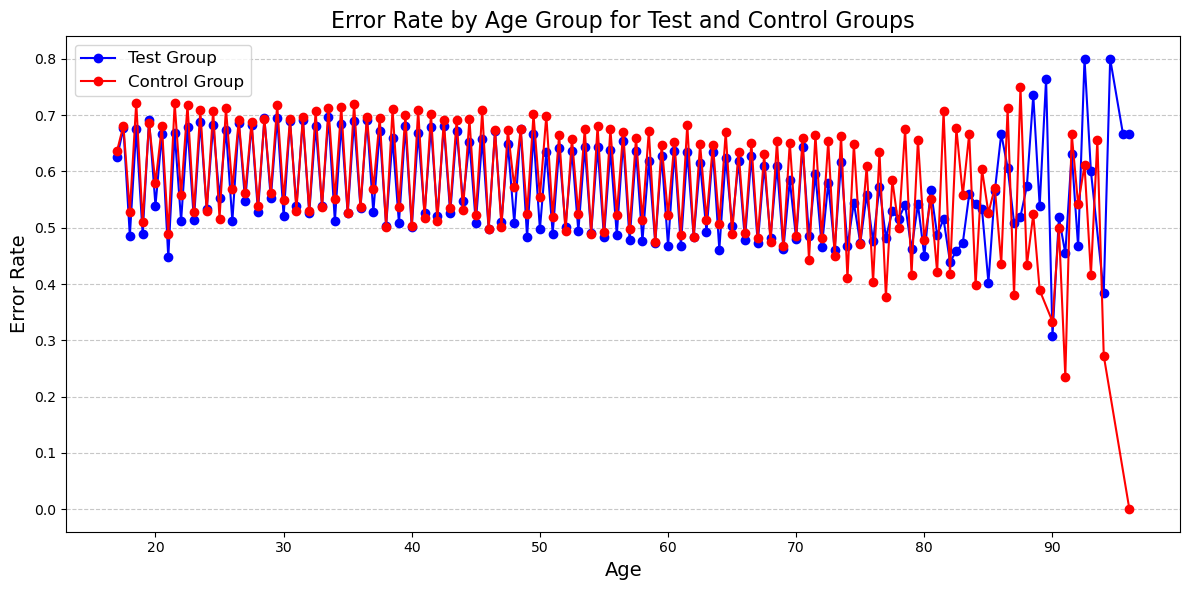

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(test_age_groups['clnt_age'], test_age_groups['error_rate'], label='Test Group', color='blue', marker='o')
plt.plot(control_age_groups['clnt_age'], control_age_groups['error_rate'], label='Control Group', color='red', marker='o')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.title('Error Rate by Age Group for Test and Control Groups', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('Error Rate by Age Group for Test and Control Groups', format='png', dpi=300)
plt.show()


In [15]:
# Calculate completion rates
completion_data = df_all_clean[df_all_clean['process_step'] == 'confirm']

# Total users in each group
total_test = len(df_all_clean[df_all_clean['Variation'] == 'Test'])
total_control = len(df_all_clean[df_all_clean['Variation'] == 'Control'])

# Users who reached the 'confirm' step
confirm_test = len(completion_data[completion_data['Variation'] == 'Test'])
confirm_control = len(completion_data[completion_data['Variation'] == 'Control'])

# Completion rates
test_completion_rate = confirm_test / total_test
control_completion_rate = confirm_control / total_control

print(f"Test Completion Rate: {test_completion_rate:.2%}")
print(f"Control Completion Rate: {control_completion_rate:.2%}")


Test Completion Rate: 14.49%
Control Completion Rate: 12.34%


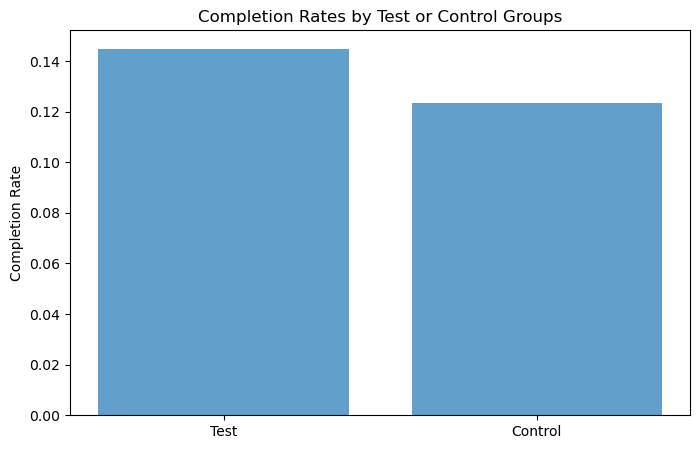

In [16]:
# Bar chart for completion rates
import matplotlib.pyplot as plt

rates = ['Test', 'Control']
completion_values = [test_completion_rate, control_completion_rate]

plt.figure(figsize=(8, 5))
plt.bar(rates, completion_values, alpha=0.7)
plt.title('Completion Rates by Test or Control Groups')
plt.ylabel('Completion Rate')
#plt.savefig("Completion Rates by Test or Control Groups",format='png', dpi=300)
plt.show()



In [17]:
# Successes and samples
successes = [confirm_test, confirm_control]
samples = [total_test, total_control]

# Perform z-test
z_stat, p_value = proportions_ztest(successes, samples)
print(f"Z-Statistic: {z_stat:.2f}, P-Value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in completion rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in completion rates.")


Z-Statistic: 17.60, P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in completion rates.


In [18]:
# Adjust threshold for one-sided test
threshold = 0.05  # 5% increase required

# Recalculate z-test with adjusted threshold
from statsmodels.stats.proportion import proportions_ztest

# Modify success array to reflect threshold
successes_adjusted = [confirm_test, confirm_control]
samples_adjusted = [total_test, total_control]

# Perform one-sided z-test
z_stat_threshold, p_value_threshold = proportions_ztest(successes_adjusted, samples_adjusted, alternative='larger')
observed_increase = test_completion_rate - control_completion_rate

print(f"Observed Increase: {observed_increase:.2%}")
print(f"Z-Statistic (Threshold Test): {z_stat_threshold:.2f}, P-Value: {p_value_threshold:.4f}")

# Conclusion
if observed_increase >= threshold and p_value_threshold < 0.05:
    print("Reject the null hypothesis: The Test group meets the 5% threshold.")
else:
    print("Fail to reject the null hypothesis: The Test group does not meet the 5% threshold.")


Observed Increase: 2.15%
Z-Statistic (Threshold Test): 17.60, P-Value: 0.0000
Fail to reject the null hypothesis: The Test group does not meet the 5% threshold.


In [19]:
#Check the Z-Stat and P-value

# Ensure 'process_step' contains "confirm" for completed users
df['is_confirmed'] = df['process_step'] == 'confirm'

# Calculate completion rates for Test and Control groups
test_group = df[df['Variation'] == 'Test']
control_group = df[df['Variation'] == 'Control']

test_confirmed_users = test_group['is_confirmed'].sum()
control_confirmed_users = control_group['is_confirmed'].sum()

total_test_users = len(test_group)
total_control_users = len(control_group)

# Calculate completion rates
test_completion_rate = test_confirmed_users / total_test_users if total_test_users > 0 else 0
control_completion_rate = control_confirmed_users / total_control_users if total_control_users > 0 else 0

# Contextualize the difference
completion_rate_difference = test_completion_rate - control_completion_rate
improvement_percentage = completion_rate_difference * 100  # Convert to percentage

# Print results
print(f"Test Group Completion Rate: {test_completion_rate:.2%}")
print(f"Control Group Completion Rate: {control_completion_rate:.2%}")
print(f"Test group completion rate improved by {improvement_percentage:.2f} percentage points over Control.")



Test Group Completion Rate: 14.49%
Control Group Completion Rate: 12.34%
Test group completion rate improved by 2.15 percentage points over Control.


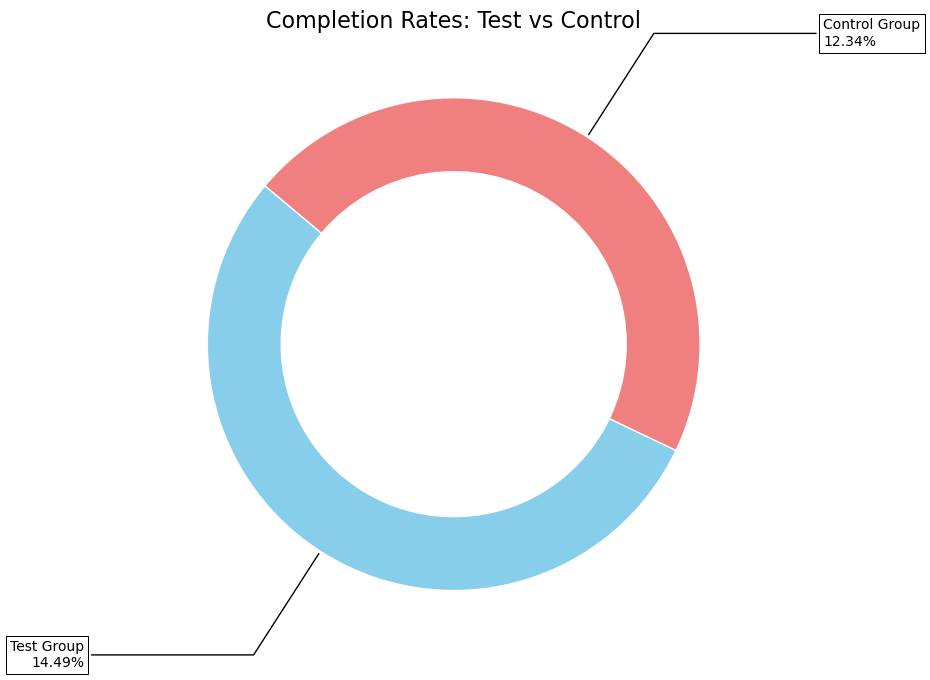

In [20]:
# Data for visualization
groups = ['Test Group', 'Control Group']
completion_rates = [test_completion_rate * 100, control_completion_rate * 100]  # Convert to percentage
colors = ['skyblue', 'lightcoral']

# Fun visualization: Completion rate as donuts
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Define the labels with percentages
labels = [f"{group}\n{rate:.2f}%" for group, rate in zip(groups, completion_rates)]

# Create a pie chart
wedges, texts = ax.pie(completion_rates, colors=colors, startangle=140, wedgeprops=dict(width=0.3, edgecolor='w'))

# Add annotations to the wedges
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.5 * np.sign(x), 1.5 * y),
                horizontalalignment=horizontalalignment, **kw)

# Add title
plt.title("Completion Rates: Test vs Control", fontsize=16)

# Save and display the fun visualization
#plt.savefig('fun_completion_rate_donut.png', format='png', dpi=300)
plt.show()


